In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
data = '/Users/lucia/.cache/kagglehub/datasets/trisha2094/weatheraus/versions/1/weatherAUS.csv'

df = pd.read_csv(data)

In [3]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [4]:
categorical = [var for var in df.columns if df[var].dtype=='O']

In [6]:
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
# print categorical variables containing missing values
for var in categorical: 
    cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())
    # view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()


# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()


# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#20% test, 80% training
X_train.shape, X_test.shape

# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64
2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport  

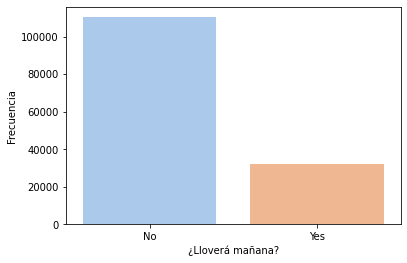

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='RainTomorrow', data=df, palette='pastel')
plt.xlabel('¿Lloverá mañana?')
plt.ylabel('Frecuencia')
plt.show()


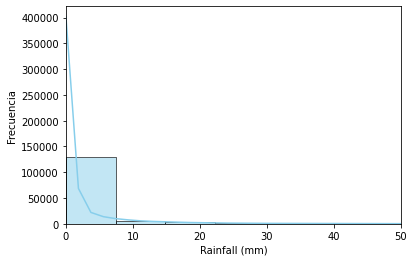

In [9]:
sns.histplot(df['Rainfall'], bins=50, kde=True, color='skyblue')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frecuencia')
plt.xlim(0, 50)  # recorte opcional para evitar outliers extremos
plt.show()

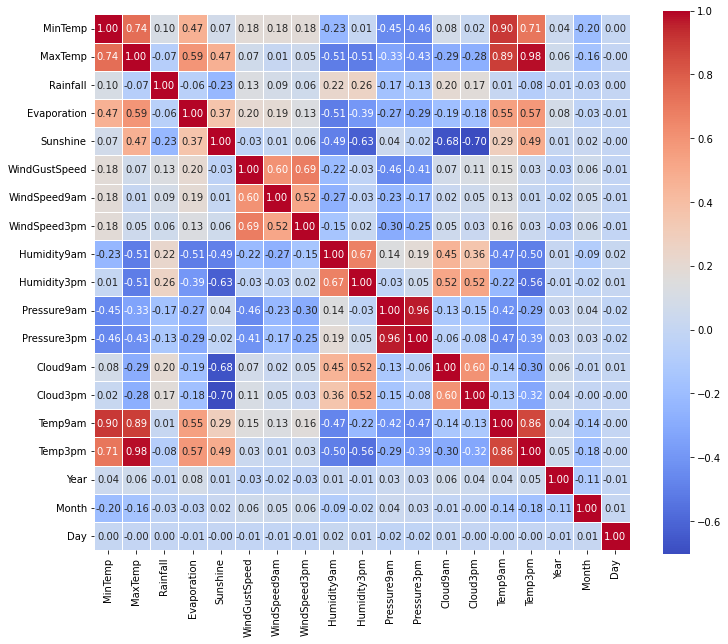

In [10]:
numerical_vars = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_vars.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.show()


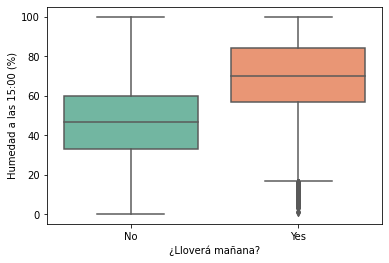

In [11]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df, palette='Set2')
plt.xlabel('¿Lloverá mañana?')
plt.ylabel('Humedad a las 15:00 (%)')
plt.show()


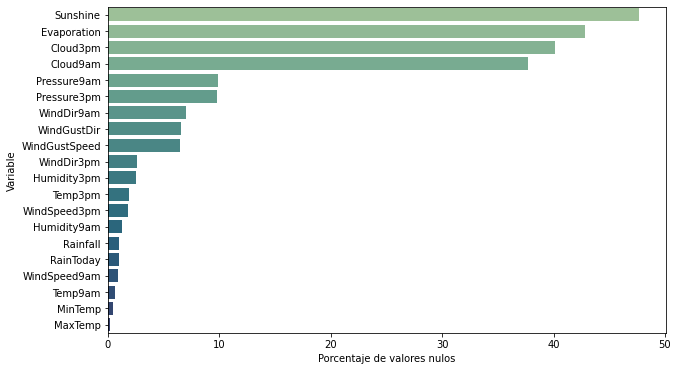

In [12]:
nulls = df.isnull().mean().sort_values(ascending=False) * 100
nulls = nulls[nulls > 0]

plt.figure(figsize=(10,6))
sns.barplot(x=nulls.values, y=nulls.index, palette='crest')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Variable')
plt.show()
